# **Librerias**

In [1]:
# Importamos las Librerias 

import scipy 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import expit, gammaln  

# Semilla 

np.random.seed(0)

# Versiones 

print(f'Numpy Version: {np.__version__}')
print(f'Scipy Version: {scipy.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.3.1
Scipy Version: 1.16.1
Matplotlib Version: 3.10.3


# **Maximum Likelihood Estimation (MLE)** 

El objetivo de la **estimación por máxima verosimilitud** es encontrar los **parámetros desconocidos** $\theta$ de un **modelo probabilístico** que hacen más probable haber observado un conjunto de datos dado.

Supongamos que observamos una **muestra de datos** $x_1, x_2, \dots, x_n$ generada por una variable aleatoria $X$ con **función de probabilidad** (PMF o PDF) $f(x \mid \theta)$, donde $\theta$ representa los parámetros del modelo.

**Asumimos que los datos son:**

* Independientes 

* Idénticamente distribuidos (IID), es decir, cada $X_i \sim f(x \mid \theta)$.

Bajo esta suposición, la **función de verosimilitud** (likelihood function) es:

$$L(\theta) = \prod_{i = 1}^n f(X_i = x_i \mid \theta)$$

Esta función mide cuán verosímil es un valor de $\theta$ dado que hemos observado los datos $x_1, \dots, x_n$. El estimador de máxima verosimilitud es el valor de $\theta$ que maximiza esta función:

$$\hat{\theta}_{MLE} = \text{argmax}_{\theta} L(\theta) = \text{argmax}_{\theta} \prod_{i = 1}^n f(X_i = x_i \mid \theta)$$

**Maximización del log-verosimilitud**: Debido a que el logaritmo es una función monótonamente creciente, maximizar la verosimilitud es equivalente a maximizar su logaritmo:

$$LL(\theta) = \log L(\theta) = \sum_{i = 1}^n  \log f(X_i = x_i \mid \theta)$$
$$\hat{\theta}_{MLE} = \text{argmax}_{\theta} LL(\theta) = \text{argmax}_{\theta} \sum_{i = 1}^n  \log f(X_i = x_i \mid \theta)$$


**Nota:** El término **verosimilitud** (likelihood) no es lo mismo que **probabilidad**. Mientras que $f(x \mid \theta)$ se interpreta como la **probabilidad de los datos dado el parámetro**, $L(\theta)$ se interpreta como la **verosimilitud del parámetro dado los datos observados.**

# **Maximum Likelihood Estimation de Familias Exponenciales**

**Familia Exponencial**

$$p(x \mid \theta) = h(x) \cdot e^{\theta^T \phi(x) - A(\theta)}$$

$$Z(\theta) = \int_{\mathcal{X}} h(x) \cdot e^{\theta^T \phi(x)} \hspace{0.1cm} dx$$

$$A(\theta) = \log Z(\theta)$$

**Verosimilitud** 

$$L(\theta) = \prod_{i = 1}^n h(x_i) \cdot e^{\theta^T \phi(x_i) - A(\theta)}$$

**Log Verosimilitud** 

$$LL(\theta) = \log \left(\prod_{i = 1}^n h(x_i) \cdot e^{\theta^T \phi(x_i) - A(\theta)}\right)$$
$$LL(\theta) = \sum_{i = 1}^n \log \left( h(x_i) \cdot e^{\theta^T \phi(x_i) - A(\theta)}\right)$$
$$LL(\theta) = \sum_{i = 1}^n \log h(x_i) +  \sum_{i = 1}^n \log\left(e^{\theta^T \phi(x_i) - A(\theta)}\right)$$
$$LL(\theta) = \sum_{i = 1}^n \log h(x_i) +  \theta^T \sum_{i = 1}^n \phi(x_i) - n \cdot A(\theta)$$

**Derivada de la función log-partición**

$$A(\theta) = \log Z(\theta) = \log \int_{\mathcal{X}} h(x) \, e^{\theta^\top \phi(x)} \, dx$$
$$\nabla_\theta A(\theta) = \frac{\int_{\mathcal{X}} h(x) \, e^{\theta^\top \phi(x)} \, \phi(x) \, dx}{\int_{\mathcal{X}} h(x) \, e^{\theta^\top \phi(x)} \, dx}$$
$$\nabla_\theta A(\theta) = \frac{\int_{\mathcal{X}} h(x) \, e^{\theta^\top \phi(x)} \, \phi(x) \, dx}{e^{A(\theta)}}$$
$$\nabla_\theta A(\theta) = \int_{\mathcal{X}} h(x) \, e^{\theta^\top \phi(x) - A(\theta)} \, \phi(x) \, dx$$
$$\nabla_\theta A(\theta) = \int_{\mathcal{X}} p(x \mid \theta) \, \phi(x) \, dx$$
$$\nabla_\theta A(\theta) = \mathbb{E}_{p(x \mid \theta)}[\phi(x)]$$

**Derivamos Pracialmente Respecto a los Parametros** 

$$LL(\theta) = \theta^T \sum_{i = 1}^n \phi(x_i) - n \cdot A(\theta)$$

$$\frac{\partial LL(\theta)}{\partial \theta} = \sum_{i = 1}^n \phi(x_i) - n \cdot \mathbb{E}_{p(x \mid \theta)}[\phi(x)]$$

**Máxima verosimilitud** 

$$\hat{\theta}_{MLE} = \text{argmax}_{\theta} LL(\theta) \rightarrow \frac{\partial LL(\theta)}{\partial \theta} = 0$$

$$\sum_{i = 1}^n \phi(x_i) - n \cdot \mathbb{E}_{p(x \mid \theta)}[\phi(x)] = 0$$

$$\mathbb{E}_{p(x \mid \theta)}[\phi(x)] = \frac{1}{n} \cdot \sum_{i = 1}^n \phi(x_i)$$

# **Bernoulli** 

**Probability Mass Function** 

$$p(x \mid p) = p^{x} \cdot (1 - p)^{1 - x}$$

$$LL(p) = \sum_{i = 1}^n x_i \log p + \sum_{i = 1}^n (1 - x_i) \log (1 - p)$$

**Familia Exponencial** 

$$p(x \mid \theta) = e^{\theta^T \phi(x) - \log \left(1 + e^{\theta}\right)}$$

$$LL(\theta) = \theta \sum_{i = 1}^n x_i - n \log \left(1 + e^{\theta}\right)$$

En donde: 

* $h(x) = 1$

* $\theta = \log \left(\frac{p}{1 - p}\right)$  

* $\phi(x) = x$

* $A(\theta) = \log \left(1 + e^{\theta}\right)$

**Máxima verosimilitud** 

$$\mathbb{E}_{p(x \mid \theta)}[\phi(x)] = \frac{1}{n} \cdot \sum_{i = 1}^n \phi(x_i)$$
$$\mathbb{E}_{p(x \mid \theta)}[X] = \frac{1}{n} \cdot \sum_{i = 1}^n x_i$$
$$p = \frac{1}{n} \cdot \sum_{i = 1}^n x_i$$
$$\frac{e^{\theta}}{1 + e^{\theta}} = \frac{1}{n} \cdot \sum_{i = 1}^n x_i$$
$$\hat{\theta} = \log \left(\frac{\frac{1}{n} \cdot \sum_{i = 1}^n x_i}{1 - \frac{1}{n} \cdot \sum_{i = 1}^n x_i}\right)$$

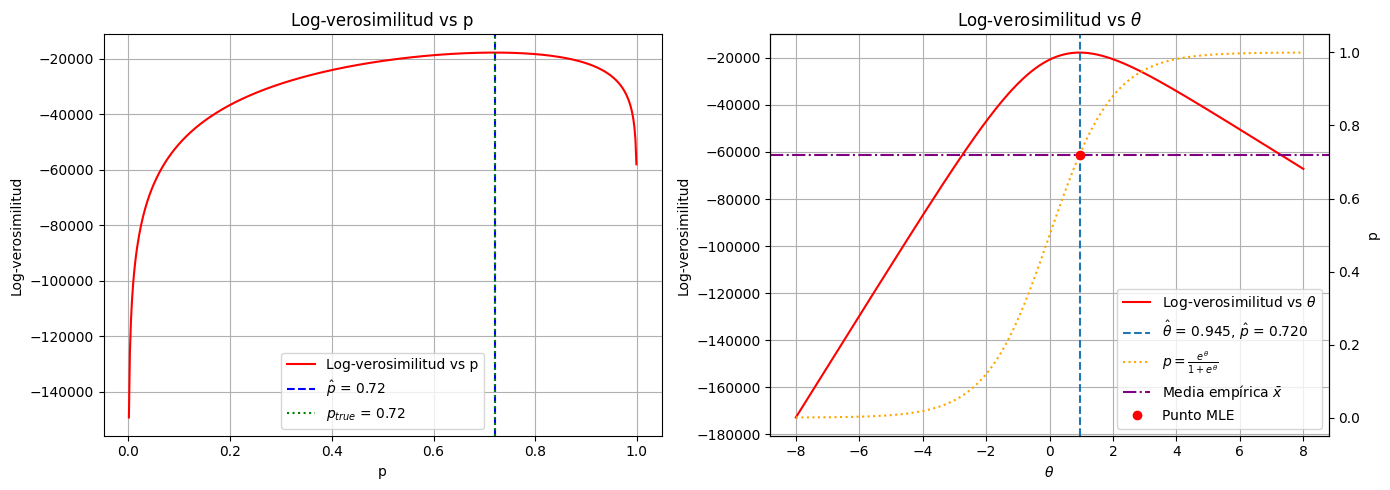

In [2]:
# Definimos la Distribucion 

n = 30000
p_true = 0.72

x = np.random.binomial(1, p_true, size = n)

# Parametro Estimado (Tambien en su forma Natural)

p_hat = x.mean()
theta_hat = np.log(p_hat / (1 - p_hat)) 

# Verosimilitud respecto a P 

p_vals = np.linspace(0.001, 0.999, 500)

LL_p = x.sum() * np.log(p_vals) + (n - x.sum()) * np.log(1 - p_vals)

# Verosimilitud Respecto a Theta 

theta_vals = np.linspace(-8, 8, 500)

LL_theta = x.sum() * theta_vals - n * np.log(1 + np.exp(theta_vals))

# Funcion respecto a Theta

theta_func = expit(theta_vals)

# Visualizamos 

fig, axes = plt.subplots(1, 2, figsize = (14, 5))

ax = axes[0]
ax.plot(p_vals, LL_p, label = 'Log-verosimilitud vs p', color = 'red')
ax.axvline(p_hat, linestyle = '--', label = rf'$\hat{{p}}$ = {p_hat:.2f}', color = 'blue')
ax.axvline(p_true, linestyle = ':', label = rf'$p_{{true}}$ = {p_true:.2f}', color = 'green')
ax.set_xlabel('p')
ax.set_ylabel('Log-verosimilitud')
ax.set_title('Log-verosimilitud vs p')
ax.legend()
ax.grid(True)

ax = axes[1]
ax.plot(theta_vals, LL_theta, label = r'Log-verosimilitud vs $\theta$', color = 'red')
ax.axvline(theta_hat, linestyle='--', label=rf'$\hat{{\theta}}$ = {theta_hat:.3f}, $\hat{{p}}$ = {p_hat:.3f}')
ax2 = ax.twinx()
ax2.plot(theta_vals, theta_func, linestyle = ':', color = 'orange', label = r'$p = \frac{e^{\theta}}{1 + e^{\theta}}$')
ax2.axhline(p_hat, color = 'purple', linestyle = '-.', label = r'Media empírica $\bar{x}$')
ax2.plot(theta_hat, p_hat, 'ro', label = r'Punto MLE')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Log-verosimilitud')
ax2.set_ylabel('p')
ax.set_title(r'Log-verosimilitud vs $\theta$')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)
ax.grid(True)

plt.tight_layout()
plt.show()

# **Poisson** 

**Probability Mass Function** 

$$p(x \mid \lambda) = \frac{\lambda^x \cdot e^{-\lambda}}{x!}$$

$$LL(\lambda) = \sum_{i = 1}^n x_i \log \lambda - n \cdot \lambda - \sum_{i = 1}^n \log x_i!$$

**Familia Exponencial** 

$$p(x \mid \theta) = \frac{1}{x!} \cdot e^{\theta^T \phi(x) - e^{\theta}}$$

$$LL(\theta) = \theta \sum_{i = 1}^n x_i - n \cdot e^{\theta} - \sum_{i = 1}^n \log x_i!$$

En donde: 

* $h(x) = \frac{1}{x!}$

* $\theta = \log (\lambda)$  

* $\phi(x) = x$

* $A(\theta) = e^{\theta}$

**Máxima verosimilitud** 

$$\mathbb{E}_{p(x \mid \theta)}[\phi(x)] = \frac{1}{n} \cdot \sum_{i = 1}^n \phi(x_i)$$
$$\mathbb{E}_{p(x \mid \theta)}[X] = \frac{1}{n} \cdot \sum_{i = 1}^n x_i$$
$$\lambda = \frac{1}{n} \cdot \sum_{i = 1}^n x_i$$
$$e^{\theta} = \frac{1}{n} \cdot \sum_{i = 1}^n x_i$$
$$\hat{\theta} = \log \left(\frac{1}{n} \cdot \sum_{i = 1}^n x_i\right)$$

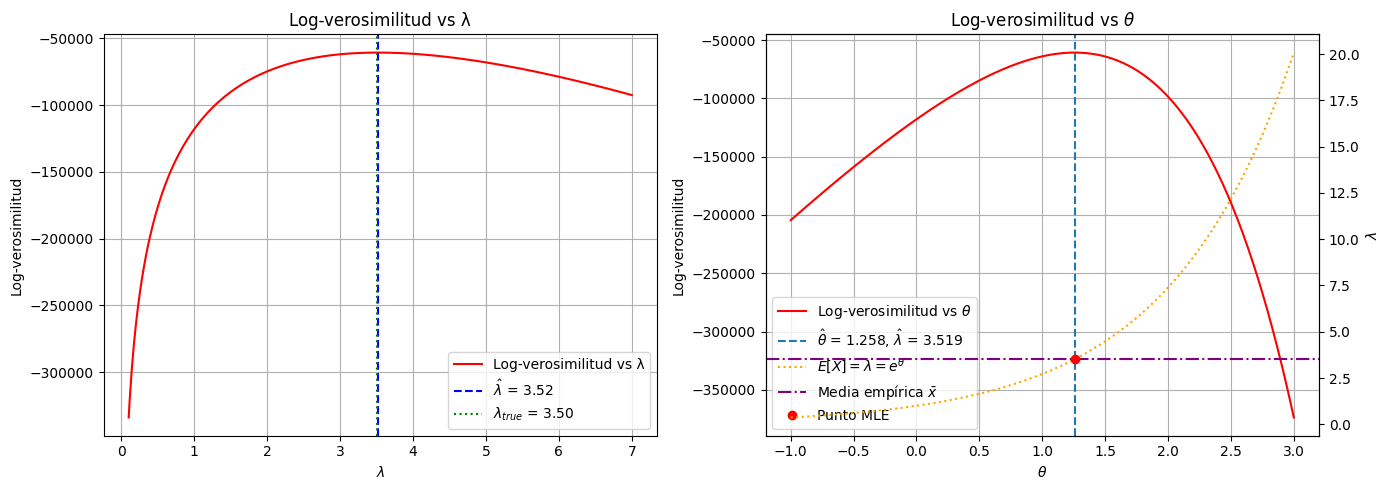

In [3]:
# Definimos la Distribucion 

n = 30000
lambda_true = 3.5

x = np.random.poisson(lam = lambda_true, size = n)

# Parametro Estimado (Tambien en su forma Natural)

lambda_hat = x.mean()
theta_hat = np.log(lambda_hat)

# Verosimilitud respecto a Lambda

lambda_vals = np.linspace(0.1, 7, 500)

LL_lambda = x.sum() * np.log(lambda_vals) - n * lambda_vals - np.sum(gammaln(x + 1))

# Verosimilitud Respecto a Theta

theta_vals = np.linspace(-1, 3, 500)

LL_theta = theta_vals * x.sum() - n * np.exp(theta_vals) - np.sum(gammaln(x + 1))

# Funcion respecto a Theta

theta_func = np.exp(theta_vals)

# Visualizamos

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
ax.plot(lambda_vals, LL_lambda, label = 'Log-verosimilitud vs λ', color = 'red')
ax.axvline(lambda_hat, linestyle = '--', label = rf'$\hat{{\lambda}}$ = {lambda_hat:.2f}', color = 'blue')
ax.axvline(lambda_true, linestyle = ':', label = rf'$\lambda_{{true}}$ = {lambda_true:.2f}', color = 'green')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('Log-verosimilitud')
ax.set_title('Log-verosimilitud vs λ')
ax.legend()
ax.grid(True)

ax = axes[1]
ax.plot(theta_vals, LL_theta, label = r'Log-verosimilitud vs $\theta$', color = 'red')
ax.axvline(theta_hat, linestyle = '--', label = rf'$\hat{{\theta}}$ = {theta_hat:.3f}, $\hat{{\lambda}}$ = {lambda_hat:.3f}')

ax2 = ax.twinx()
ax2.plot(theta_vals, theta_func, linestyle = ':', color = 'orange', label = r'$E[X] = \lambda = e^{\theta}$')
ax2.axhline(lambda_hat, color = 'purple', linestyle = '-.', label = r'Media empírica $\bar{x}$')
ax2.plot(theta_hat, lambda_hat, 'ro', label = 'Punto MLE')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Log-verosimilitud')
ax2.set_ylabel(r'$\lambda$')
ax.set_title(r'Log-verosimilitud vs $\theta$')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)
ax.grid(True)

plt.tight_layout()
plt.show()

# **Geometrica** 

**Probability Mass Function** 

$$p(x \mid p) = p \cdot (1 - p)^{x}$$

$$LL(p) = n \cdot  \log p + \sum_{i = 1}^n x_i \log (1 - p)$$

**Familia Exponencial** 

$$p(x \mid \theta) = e^{\theta^T \phi(x) + \log (1 - e^{\theta})}$$

$$LL(\theta) = \theta \sum_{i = 1}^n x_i + n \log (1 - e^{\theta})$$

En donde: 

* $h(x) = 1$

* $\theta = \log(1 - p)$  

* $\phi(x) = x$

* $A(\theta) = - \log (1 - e^{\theta})$

**Máxima verosimilitud** 

$$\mathbb{E}_{p(x \mid \theta)}[\phi(x)] = \frac{1}{n} \cdot \sum_{i = 1}^n \phi(x_i)$$
$$\mathbb{E}_{p(x \mid \theta)}[X] = \frac{1}{n} \cdot \sum_{i = 1}^n x_i$$
$$\frac{1 - p}{p} = \frac{1}{n} \cdot \sum_{i = 1}^n x_i $$
$$\frac{e^{\theta}}{1 - e^{\theta}} = \frac{1}{n} \cdot \sum_{i = 1}^n x_i $$
$$\hat{\theta} = \log \left(\frac{\frac{1}{n} \cdot \sum_{i = 1}^n x_i}{\frac{1}{n} \cdot \sum_{i = 1}^n x_i + 1}\right)$$

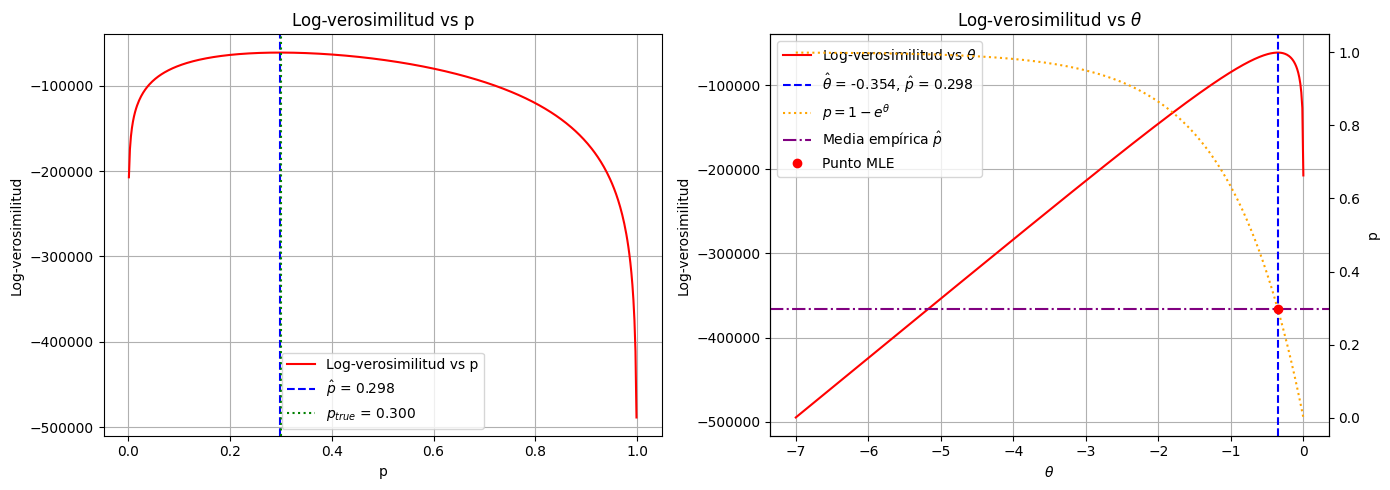

In [4]:
# Definimos la Distribucion 

n = 30000
p_true = 0.3 

x = np.random.geometric(p_true, size = n) - 1

# Parametro Estimado (Tambien en su forma Natural)

p_hat = 1 / (1 + x.mean())
theta_hat = np.log(1 - p_hat)

# Verosimilitud respecto a P

p_vals = np.linspace(0.001, 0.999, 500)
LL_p = n * np.log(p_vals) + x.sum() * np.log(1 - p_vals)

# Verosimilitud Respecto a Theta

theta_vals = np.linspace(-7, -0.001, 500)
LL_theta = theta_vals * x.sum() + n * np.log(1 - np.exp(theta_vals))

# Funcion respecto a Theta

theta_func = 1 - np.exp(theta_vals)

# Visualizamos

fig, axes = plt.subplots(1, 2, figsize = (14, 5))

ax = axes[0]
ax.plot(p_vals, LL_p, color = 'red', label = 'Log-verosimilitud vs p')
ax.axvline(p_hat, linestyle = '--', color = 'blue', label = rf'$\hat{{p}}$ = {p_hat:.3f}')
ax.axvline(p_true, linestyle = ':', color = 'green', label = rf'$p_{{true}}$ = {p_true:.3f}')
ax.set_xlabel('p')
ax.set_ylabel('Log-verosimilitud')
ax.set_title('Log-verosimilitud vs p')
ax.legend()
ax.grid(True)

ax = axes[1]
ax.plot(theta_vals, LL_theta, color = 'red', label = r'Log-verosimilitud vs $\theta$')
ax.axvline(theta_hat, linestyle='--', label = rf'$\hat{{\theta}}$ = {theta_hat:.3f}, $\hat{{p}}$ = {p_hat:.3f}', color = 'blue')

ax2 = ax.twinx()
ax2.plot(theta_vals, theta_func, linestyle = ':', color = 'orange', label = r'$p = 1 - e^{\theta}$')
ax2.axhline(p_hat, color='purple', linestyle = '-.', label = r'Media empírica $\hat{p}$')
ax2.plot(theta_hat, p_hat, 'ro', label = 'Punto MLE')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Log-verosimilitud')
ax2.set_ylabel('p')
ax.set_title(r'Log-verosimilitud vs $\theta$')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)
ax.grid(True)

plt.tight_layout()
plt.show()

# **Exponencial** 

**Probability Density Function** 

$$p(x \mid \lambda) = \lambda \cdot e^{- \lambda x}$$

$$LL(\lambda) = n \cdot \log \lambda - \lambda \sum_{i=1}^n x_i $$

**Familia Exponencial** 

$$p(x \mid \theta) = e^{\theta^T \phi(x) + \log (- \theta)}$$

$$LL(\theta) = \theta \sum_{i = 1}^n x_i + n \cdot \log (- \theta)$$

En donde: 

* $h(x) = 1$

* $\theta = - \lambda$  

* $\phi(x) = x$

* $A(\theta) = - \log (- \theta)$

**Máxima verosimilitud** 

$$\mathbb{E}_{p(x \mid \theta)}[\phi(x)] = \frac{1}{n} \cdot \sum_{i = 1}^n \phi(x_i)$$
$$\mathbb{E}_{p(x \mid \theta)}[X] = \frac{1}{n} \cdot \sum_{i = 1}^n x_i $$
$$\frac{1}{\lambda} = \frac{1}{n} \cdot \sum_{i = 1}^n x_i $$
$$\frac{1}{-\theta} = \frac{1}{n} \cdot \sum_{i = 1}^n x_i $$
$$\hat{\theta} = - \frac{1}{\frac{1}{n} \cdot \sum_{i = 1}^n x_i}$$

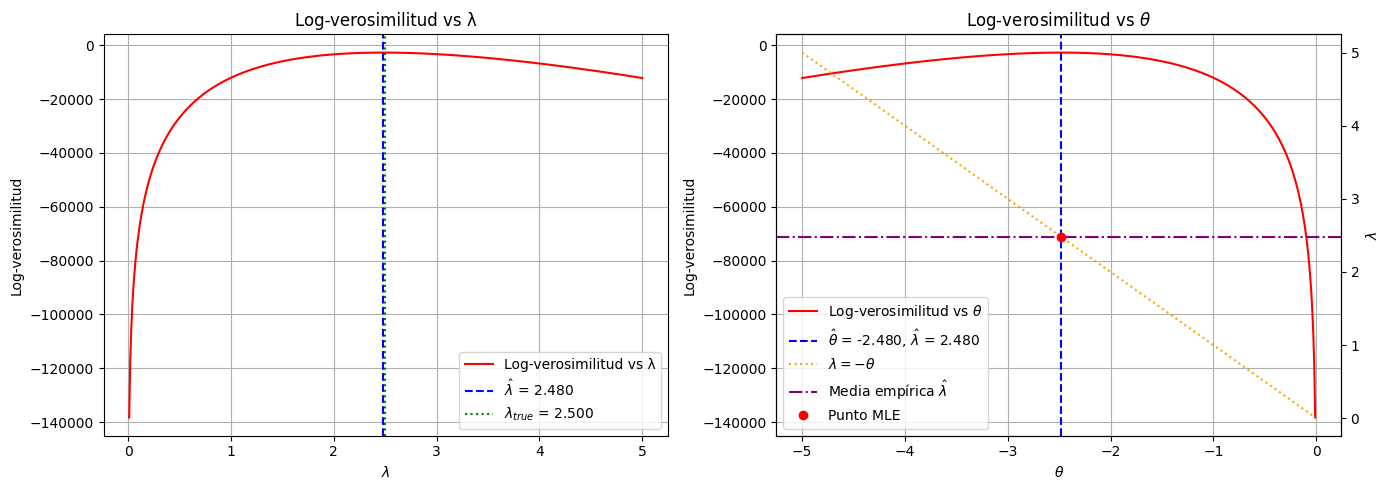

In [5]:
# Definimos la Distribucion 

n = 30000
lambda_true = 2.5

x = np.random.exponential(scale = 1/lambda_true, size = n)

# Parametro Estimado (Tambien en su forma Natural)

lambda_hat = 1 / x.mean()
theta_hat = -lambda_hat 

# Verosimilitud respecto a Lambda

lambda_vals = np.linspace(0.01, 5, 500)
LL_lambda = n * np.log(lambda_vals) - lambda_vals * x.sum()

# Verosimilitud Respecto a Theta

theta_vals = np.linspace(-5, -0.01, 500)
LL_theta = theta_vals * x.sum() + n * np.log(-theta_vals)

# Funcion respecto a Theta

theta_func = -theta_vals 

# Visualizamos

fig, axes = plt.subplots(1, 2, figsize = (14, 5))

ax = axes[0]
ax.plot(lambda_vals, LL_lambda, color = 'red', label = 'Log-verosimilitud vs λ')
ax.axvline(lambda_hat, linestyle = '--', color = 'blue', label = rf'$\hat{{\lambda}}$ = {lambda_hat:.3f}')
ax.axvline(lambda_true, linestyle = ':', color = 'green', label = rf'$\lambda_{{true}}$ = {lambda_true:.3f}')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('Log-verosimilitud')
ax.set_title('Log-verosimilitud vs λ')
ax.legend()
ax.grid(True)

ax = axes[1]
ax.plot(theta_vals, LL_theta, color = 'red', label = r'Log-verosimilitud vs $\theta$')
ax.axvline(theta_hat, linestyle = '--', color = 'blue', label = rf'$\hat{{\theta}}$ = {theta_hat:.3f}, $\hat{{\lambda}}$ = {lambda_hat:.3f}')

ax2 = ax.twinx()
ax2.plot(theta_vals, theta_func, linestyle = ':', color = 'orange', label = r'$\lambda = -\theta$')
ax2.axhline(lambda_hat, color = 'purple', linestyle = '-.', label = r'Media empírica $\hat{\lambda}$')
ax2.plot(theta_hat, lambda_hat, 'ro', label='Punto MLE')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Log-verosimilitud')
ax2.set_ylabel(r'$\lambda$')
ax.set_title(r'Log-verosimilitud vs $\theta$')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)
ax.grid(True)

plt.tight_layout()
plt.show()

# **Normal**

**Probability Density Function** 

$$p(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{(2 \pi \sigma^2)}} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

$$LL(\mu, \sigma^2) = - \frac{n}{2} \log 2\pi\sigma^2 - \frac{1}{2\sigma^2} \cdot \left(\sum_{i=1}^n x_i^2 - 2 \sum_{i=1}^n x_i \mu + n \mu^2\right)$$

**Familia Exponencial** 

$$p(x \mid \theta) = e^{\theta^T \phi(x) + \frac{\theta_2^2}{4 \cdot \theta_{1}} - \frac{1}{2} \log \left(\frac{-\pi}{\theta_1}\right)}$$

$$LL(\theta_1, \theta_2) = \theta_1 \sum_{i = 1}^n x_i^2 + \theta_2 \sum_{i = 1}^n x_i + n \cdot \frac{\theta_2^2}{4 \cdot \theta_{1}} - \frac{n}{2} \log \left(\frac{-\pi}{\theta_1}\right)$$

En donde: 

* $h(x) = 1$

* $\theta = \Big(- \frac{1}{2\sigma^2}, \hspace{0.2cm} \frac{\mu}{\sigma^2} \Big)$  

* $\phi(x) = \Big(x^2, \hspace{0.2cm} x \Big)$

* $A(\theta) = - \frac{\theta_2^2}{4 \cdot \theta_{1}} + \frac{1}{2} \log \left(\frac{-\pi}{\theta_1}\right)$

**Máxima verosimilitud** 

$$\mathbb{E}_{p(x \mid \theta)}[\phi(x)] = \frac{1}{n} \cdot \sum_{i = 1}^n \phi(x_i)$$

* $\theta_2$ 

$$\mathbb{E}_{p(x \mid \theta)}[X] = \frac{1}{n} \cdot \sum_{i = 1}^n x_i$$
$$\mu = \frac{1}{n} \cdot \sum_{i = 1}^n x_i$$
$$- \frac{\theta_2}{2\theta_{1}} = \frac{1}{n} \cdot \sum_{i = 1}^n x_i$$
$$\hat{\theta_2} = \frac{-2\theta_{1}}{n} \cdot \sum_{i = 1}^n x_i$$

* $\theta_1$ 

$$\mathbb{E}_{p(x \mid \theta)}[X^2] = \frac{1}{n} \cdot \sum_{i = 1}^n x_i^2$$
$$\mu + \sigma^2 = \frac{1}{n} \cdot \sum_{i = 1}^n x_i^2$$
$$\left(- \frac{\theta_2}{2\theta_{1}}\right)^2 + \left(- \frac{1}{2\theta_{1}}\right) = \frac{1}{n} \cdot \sum_{i = 1}^n x_i^2$$
$$\frac{\theta_2^2}{4\theta_{1}^2} - \frac{1}{2\theta_{1}} = \frac{1}{n} \cdot \sum_{i = 1}^n x_i^2$$
$$\hat{\theta_1} = - \frac{1}{2 \cdot \left(\frac{1}{n} \cdot \sum_{i = 1}^n x_i^2 - \left(\frac{1}{n} \cdot \sum_{i = 1}^n x_i\right)^2\right)}$$



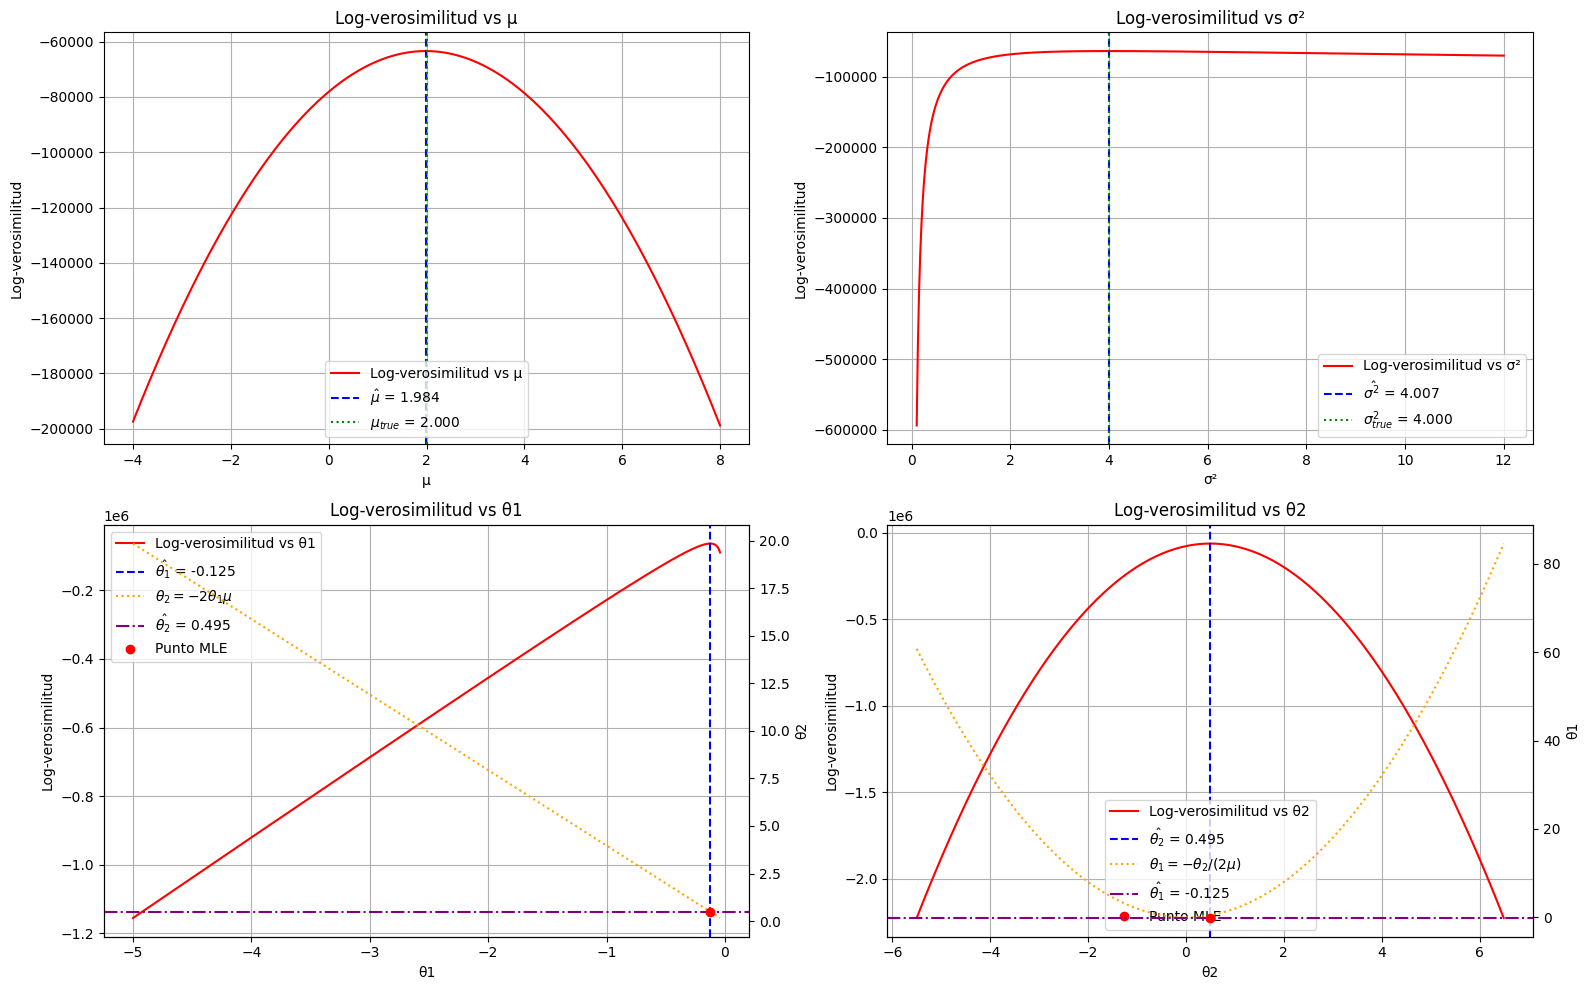

In [6]:
# Definimos la Distribucion 

n = 30000
mu_true = 2.0
sigma2_true = 4.0

x = np.random.normal(loc = mu_true, scale = np.sqrt(sigma2_true), size = n)

# Parametro Estimado (Tambien en su forma Natural)

mu_hat = x.mean()
sigma2_hat = x.var()

theta1_hat = -1/(2*sigma2_hat)
theta2_hat = mu_hat / sigma2_hat

# Verosimilitud respecto a Mu y Sigma^2

mu_vals = np.linspace(mu_true - 3*np.sqrt(sigma2_true), mu_true + 3*np.sqrt(sigma2_true), 500)
sigma2_vals = np.linspace(0.1, sigma2_true*3, 500)

LL_mu = -n/2*np.log(2*np.pi*sigma2_hat) - np.sum((x[:, None] - mu_vals)**2, axis=0)/(2*sigma2_hat)
LL_sigma2 = -n/2*np.log(2*np.pi*sigma2_vals) - np.sum((x[:, None] - mu_hat)**2, axis=0)/(2*sigma2_vals)

# Verosimilitud Respecto a Thetas

theta1_vals = np.linspace(-1/(2*0.1), -1/(2*(sigma2_true*3)), 500)
theta2_vals = np.linspace(theta2_hat - 3*np.sqrt(sigma2_true), theta2_hat + 3*np.sqrt(sigma2_true), 500)

LL_theta1 = theta1_vals*np.sum(x**2) + theta2_hat*np.sum(x) + n*(theta2_hat**2)/(4*theta1_vals) - n/2*np.log(-np.pi/theta1_vals)
LL_theta2 = theta1_hat*np.sum(x**2) + theta2_vals*np.sum(x) + n*(theta2_vals**2)/(4*theta1_hat) - n/2*np.log(-np.pi/theta1_hat)

# Funcion respecto a Theta

theta2_from_theta1 = -2 * theta1_vals * mu_hat
theta1_from_theta2 = -theta2_vals**2/(4 * theta1_hat)

# Visualizamos

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

ax = axes[0,0]
ax.plot(mu_vals, LL_mu, color = 'red', label = 'Log-verosimilitud vs μ')
ax.axvline(mu_hat, color = 'blue', linestyle = '--', label = rf'$\hat{{\mu}}$ = {mu_hat:.3f}')
ax.axvline(mu_true, color = 'green', linestyle = ':', label = rf'$\mu_{{true}}$ = {mu_true:.3f}')
ax.set_xlabel('μ')
ax.set_ylabel('Log-verosimilitud')
ax.set_title('Log-verosimilitud vs μ')
ax.legend()
ax.grid(True)

ax = axes[0,1]
ax.plot(sigma2_vals, LL_sigma2, color = 'red', label = 'Log-verosimilitud vs σ²')
ax.axvline(sigma2_hat, color = 'blue', linestyle = '--', label = rf'$\hat{{\sigma^2}}$ = {sigma2_hat:.3f}')
ax.axvline(sigma2_true, color = 'green', linestyle = ':', label = rf'$\sigma^2_{{true}}$ = {sigma2_true:.3f}')
ax.set_xlabel('σ²')
ax.set_ylabel('Log-verosimilitud')
ax.set_title('Log-verosimilitud vs σ²')
ax.legend()
ax.grid(True)

ax = axes[1,0]
ax.plot(theta1_vals, LL_theta1, color = 'red', label = 'Log-verosimilitud vs θ1')
ax.axvline(theta1_hat, color = 'blue', linestyle = '--', label = rf'$\hat{{\theta_1}}$ = {theta1_hat:.3f}')

ax2 = ax.twinx()
ax2.plot(theta1_vals, theta2_from_theta1, color = 'orange', linestyle = ':', label = r'$\theta_2 = -2 \theta_1 \mu$')
ax2.axhline(theta2_hat, color = 'purple', linestyle = '-.', label = rf'$\hat{{\theta_2}}$ = {theta2_hat:.3f}')
ax2.plot(theta1_hat, theta2_hat, 'ro', label = 'Punto MLE')

ax.set_xlabel('θ1')
ax.set_ylabel('Log-verosimilitud')
ax2.set_ylabel('θ2')
ax.set_title('Log-verosimilitud vs θ1')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)
ax.grid(True)

ax = axes[1,1]
ax.plot(theta2_vals, LL_theta2, color = 'red', label = 'Log-verosimilitud vs θ2')
ax.axvline(theta2_hat, color = 'blue', linestyle = '--', label = rf'$\hat{{\theta_2}}$ = {theta2_hat:.3f}')

ax2 = ax.twinx()
ax2.plot(theta2_vals, theta1_from_theta2, color = 'orange', linestyle = ':', label = r'$\theta_1 = -\theta_2/(2\mu)$')
ax2.axhline(theta1_hat, color = 'purple', linestyle = '-.', label = rf'$\hat{{\theta_1}}$ = {theta1_hat:.3f}')
ax2.plot(theta2_hat, theta1_hat, 'ro', label = 'Punto MLE')

ax.set_xlabel('θ2')
ax.set_ylabel('Log-verosimilitud')
ax2.set_ylabel('θ1')
ax.set_title('Log-verosimilitud vs θ2')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)
ax.grid(True)

plt.tight_layout()
plt.show()